In [1]:
import numpy as np
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
import json


version = '1.0.0'
check_data_version = '1.1.4'


with open(f'../create_dataset/v{check_data_version}/label.json', 'r', encoding='utf-8') as file:
    label = json.load(file)
    
word_count = label['label_count'] * 2 - 1

In [3]:
data_dir = f'../create_dataset/v{check_data_version}/data'
data_files_list = os.listdir(data_dir)


data_files_list.sort()


data = np.concatenate([
    np.load(f'{data_dir}/{file}') for file in data_files_list
], axis=0)
np.shape(data)

(16263, 10, 81)

In [4]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(*labels)

(16263, 10, 80)
(16263,)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [5]:
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=word_count)
y_data.shape

(16263, 29)

In [6]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(14636, 10, 80) (14636, 29)
(1627, 10, 80) (1627, 29)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(word_count, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                37120     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 29)                957       
                                                                 
Total params: 40157 (156.86 KB)
Trainable params: 40157 (156.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
check_data_version = check_data_version.replace('.', '')
version = version.replace('.', '')

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint(f'../models/data_{check_data_version}_train_{version}_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200


440/458 [===========================>..] - ETA: 0s - loss: 17.6363 - acc: 0.3673
Epoch 1: val_acc improved from -inf to 0.66073, saving model to ../models\data_114_train_100_model.h5
458/458 [==============================] - 3s 4ms/step - loss: 17.0442 - acc: 0.3772 - val_loss: 1.8124 - val_acc: 0.6607 - lr: 0.0010
Epoch 2/200
 62/458 [===>..........................] - ETA: 1s - loss: 1.4658 - acc: 0.7117

c:\PYTHON\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


439/458 [===========================>..] - ETA: 0s - loss: 0.9574 - acc: 0.7937
Epoch 2: val_acc improved from 0.66073 to 0.88015, saving model to ../models\data_114_train_100_model.h5
458/458 [==============================] - 1s 3ms/step - loss: 0.9419 - acc: 0.7966 - val_loss: 0.4150 - val_acc: 0.8801 - lr: 0.0010
Epoch 3/200
447/458 [============================>.] - ETA: 0s - loss: 0.5476 - acc: 0.9193
Epoch 3: val_acc improved from 0.88015 to 0.94960, saving model to ../models\data_114_train_100_model.h5
458/458 [==============================] - 1s 3ms/step - loss: 0.5389 - acc: 0.9203 - val_loss: 0.1842 - val_acc: 0.9496 - lr: 0.0010
Epoch 4/200
454/458 [============================>.] - ETA: 0s - loss: 0.1827 - acc: 0.9495
Epoch 4: val_acc improved from 0.94960 to 0.95144, saving model to ../models\data_114_train_100_model.h5
458/458 [==============================] - 1s 3ms/step - loss: 0.1830 - acc: 0.9496 - val_loss: 0.1406 - val_acc: 0.9514 - lr: 0.0010
Epoch 5/200
447/458

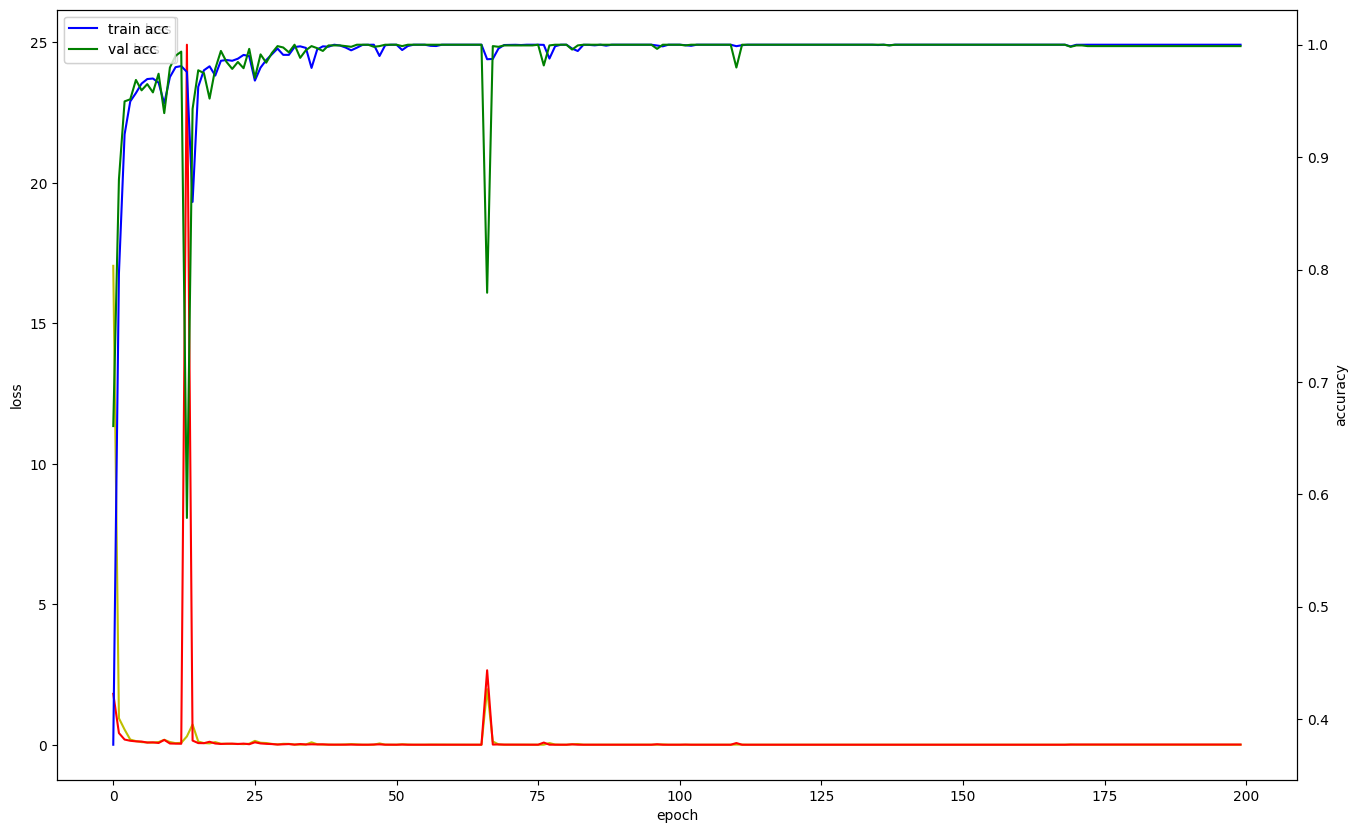

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.savefig(f'../readme_img/data_{check_data_version}_train_{version}.png')
plt.show()

In [11]:

from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model


model = load_model(f'../models/data_{check_data_version}_train_{version}_model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

51/51 [==============================] - 0s 2ms/step


array([[[1580,    0],
        [   0,   47]],

       [[1503,    0],
        [   0,  124]],

       [[1503,    0],
        [   0,  124]],

       [[1520,    0],
        [   0,  107]],

       [[1524,    0],
        [   0,  103]],

       [[1529,    0],
        [   0,   98]],

       [[1508,    0],
        [   0,  119]],

       [[1516,    0],
        [   0,  111]],

       [[1522,    0],
        [   0,  105]],

       [[1520,    0],
        [   0,  107]],

       [[1493,    0],
        [   0,  134]],

       [[1509,    0],
        [   0,  118]],

       [[1509,    0],
        [   0,  118]],

       [[1520,    0],
        [   0,  107]],

       [[1522,    0],
        [   0,  105]]], dtype=int64)